In [1]:
%matplotlib notebook
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('../data_and_visualisation/HTRU_2.csv')
data.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS',
                'Class']

In [3]:
x = data.drop('Class', axis = 'columns')
y = data['Class']

#### podatke cemo normalizovati jer algoritmi klasterovanja rade sa razdaljinama i ne zelimo da podaci koji su po svojoj prirodi veci odvuku rezultat na svoju stranu

In [4]:
ssc = StandardScaler()
ssc.fit(x)
x_skal = ssc.transform(x)

In [5]:
x_skal = pd.DataFrame(x_skal)
x_skal.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS']

In [6]:
x = x_skal

In [7]:
pca = PCA()
x_pca = pca.fit_transform(x_skal)

In [8]:
x_pca = pd.DataFrame(x_pca)

In [9]:
x_pca_y = pd.DataFrame.copy(x_pca)
x_pca_y['Class'] = y

#### crtamo pocatke koristeci PCA i bojimo ih njihovim pravim klasama
#### klasterovanje je nenadgledano i klase cemo u procesu modelovanj zanemariti ali bilo bi interesantno obratiti paznju i mozda uociti neko poklapanje klasifikacije i klasterovanja

<IPython.core.display.Javascript object>


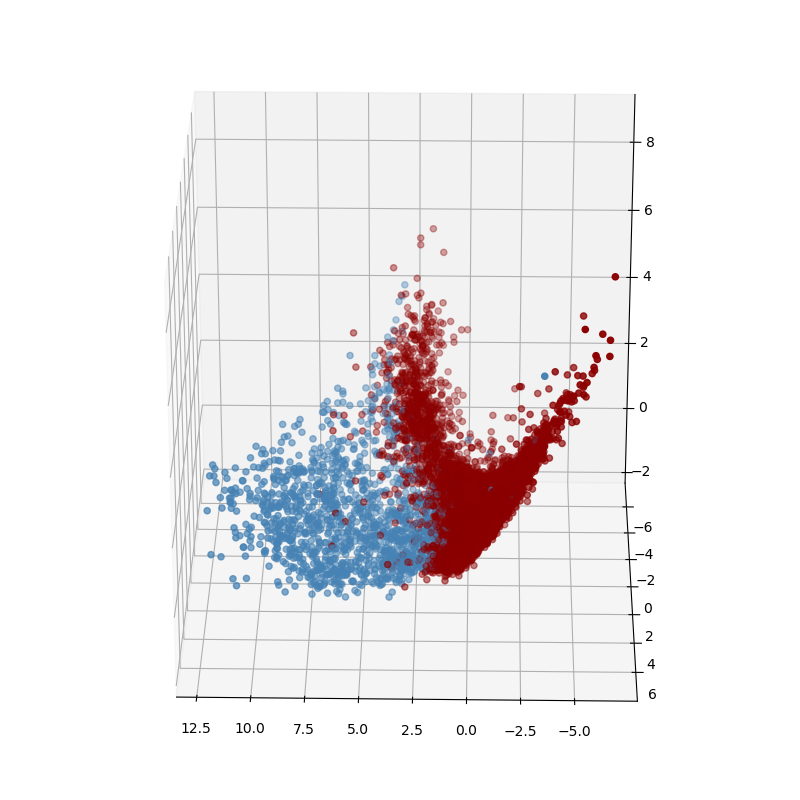

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def boja(xs):
    ret = []
    for x in xs:
        if x == 1:
            ret.append('SteelBlue')
        else:
            ret.append('DarkRed')
    return ret

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.view_init(27,91)
ax.scatter(x_pca_y[0], x_pca_y[1], x_pca_y[2], c = boja(x_pca_y['Class']))
plt.show()

In [11]:
def klasteruj_i_prikazi(k, x, x_pca, sses = None, siluete = None):
    fig = plt.figure(figsize=(4, 4))
    ax = Axes3D(fig)
    ax.view_init(27,91)
    
    ksredina = KMeans(n_clusters=k)
    ksredina.fit(x)
    
    print("SSE: %f" % ksredina.inertia_)
    if(sses != None):
        sses.append(ksredina.inertia_)
    print("Silueta: %f" % silhouette_score(x, ksredina.labels_))
    if(siluete != None):
        siluete.append(silhouette_score(x, ksredina.labels_))

    ax.scatter(x_pca[0], x_pca[1], x_pca[2], c=ksredina.labels_)

In [12]:
sses = []
siluete = []
ssesPCA = []
siluetePCA = []

#### koristicemo algoritam k sredina za ka od dva do osam
-  prvo cemo da klasterujemo na originalnim podacima i onda koristeci PCA da prikazemo rezultate,
-  zatim cemo prvo primeniti PCA na podatke pa onda klasterovati i uopredjivati rezultate sa prethodnim

<IPython.core.display.Javascript object>


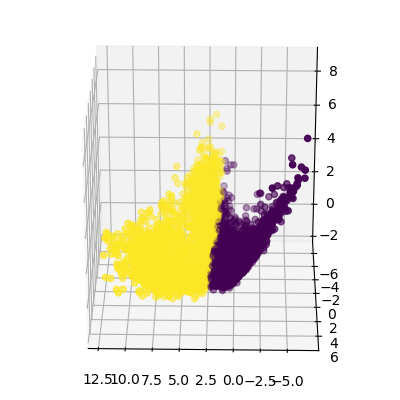

SSE: 92209.414914
Silueta: 0.601098


In [13]:
klasteruj_i_prikazi(2, x, x_pca, sses, siluete)
#klasterujemo originalne podatke i tim klasterima odredjujemo kako bojimo pca podatke

<IPython.core.display.Javascript object>


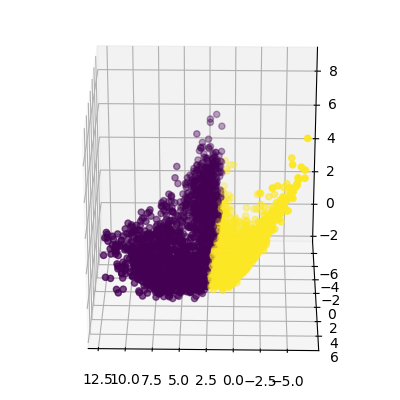

SSE: 92209.421009
Silueta: 0.601098


In [14]:
klasteruj_i_prikazi(2, x_pca, x_pca, ssesPCA, siluetePCA)
#klasterujemo i crtamo pca podatke

<IPython.core.display.Javascript object>


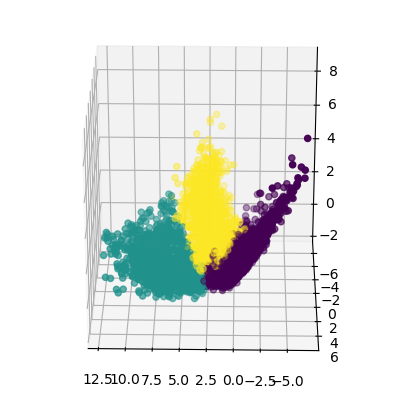

SSE: 68067.313721
Silueta: 0.517414


In [15]:
klasteruj_i_prikazi(3, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


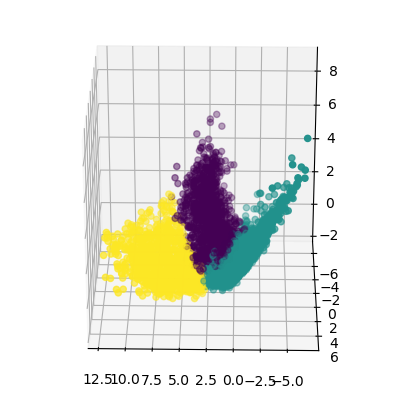

SSE: 68067.354250
Silueta: 0.517517


In [16]:
klasteruj_i_prikazi(3, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


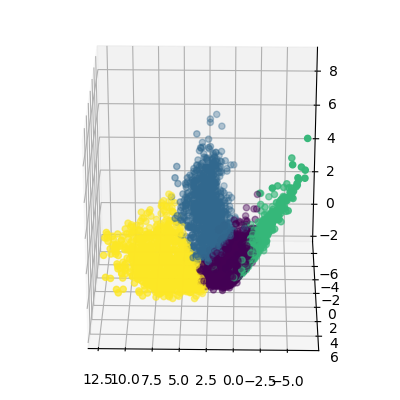

SSE: 53117.536799
Silueta: 0.356601


In [17]:
klasteruj_i_prikazi(4, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


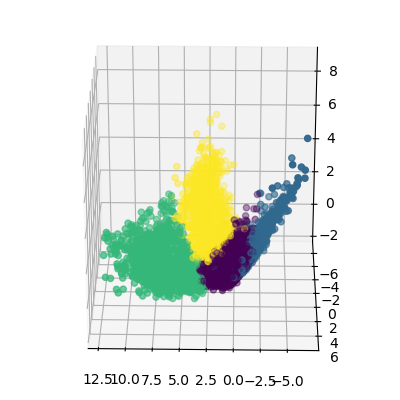

SSE: 53117.543488
Silueta: 0.357951


In [18]:
klasteruj_i_prikazi(4, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


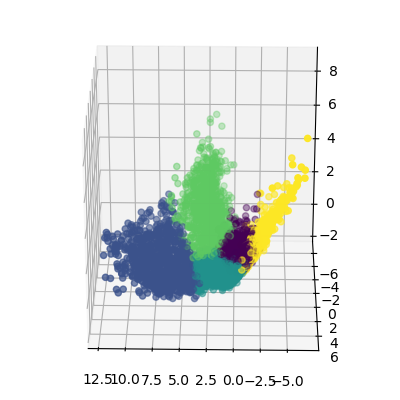

SSE: 44216.989751
Silueta: 0.303277


In [19]:
klasteruj_i_prikazi(5, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


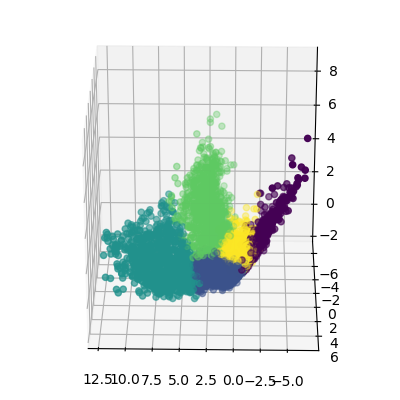

SSE: 44217.005807
Silueta: 0.302975


In [20]:
klasteruj_i_prikazi(5, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


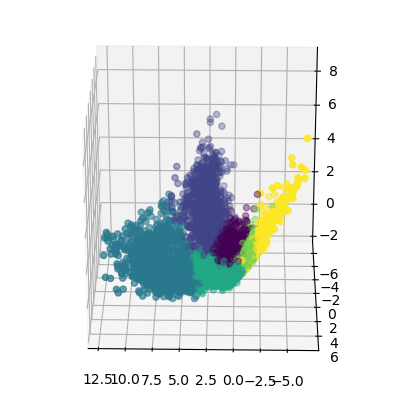

SSE: 39131.605612
Silueta: 0.267757


In [21]:
klasteruj_i_prikazi(6, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


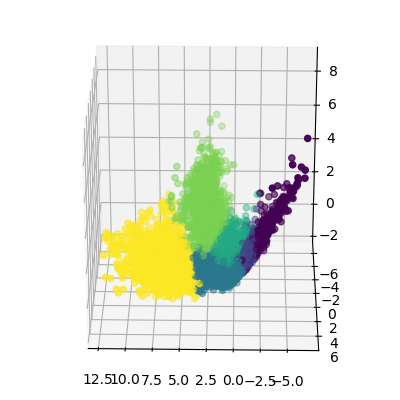

SSE: 39131.785091
Silueta: 0.267721


In [22]:
klasteruj_i_prikazi(6, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


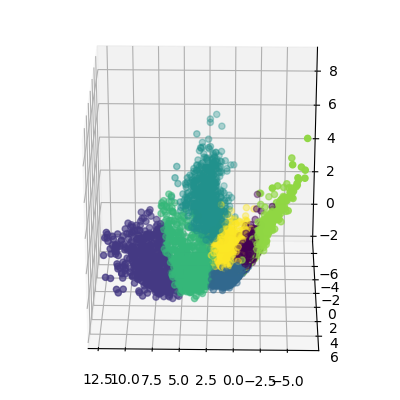

SSE: 34349.531402
Silueta: 0.273161


In [23]:
klasteruj_i_prikazi(7, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


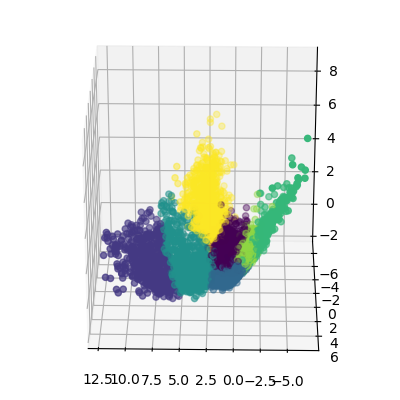

SSE: 34350.038063
Silueta: 0.274419


In [24]:
klasteruj_i_prikazi(7, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


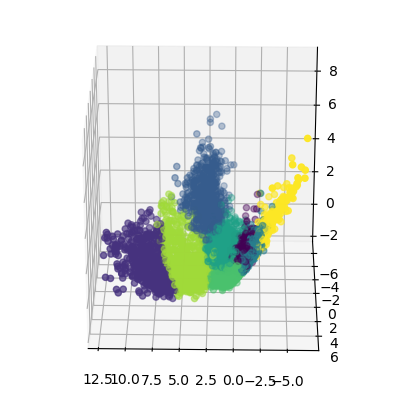

SSE: 31188.989808
Silueta: 0.277754


In [25]:
klasteruj_i_prikazi(8, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


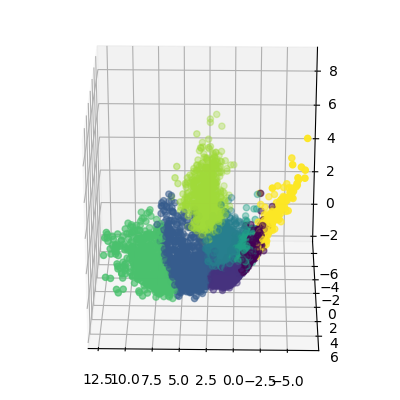

SSE: 31189.000497
Silueta: 0.278074


In [26]:
klasteruj_i_prikazi(8, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


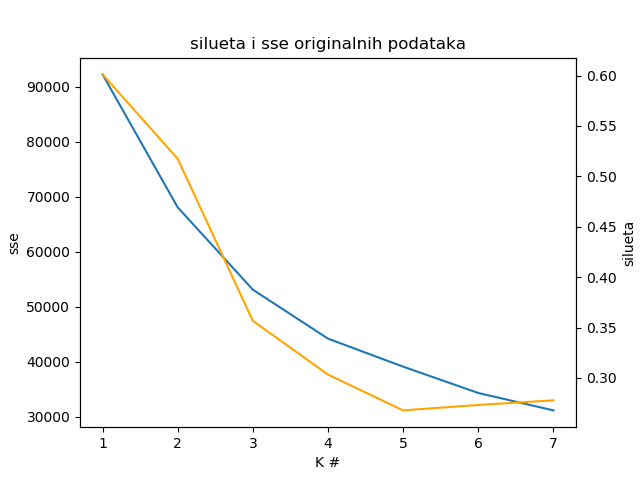

In [27]:
xs = [*range(1, 8)]

fig,ax = plt.subplots()
ax.plot(xs, sses)
ax.set_xlabel("K #")
ax.set_ylabel("sse")

ax2=ax.twinx()
ax2.plot(xs, siluete, c = 'orange')
ax2.set_ylabel("silueta")
plt.title("silueta i sse originalnih podataka")
plt.show()


<IPython.core.display.Javascript object>


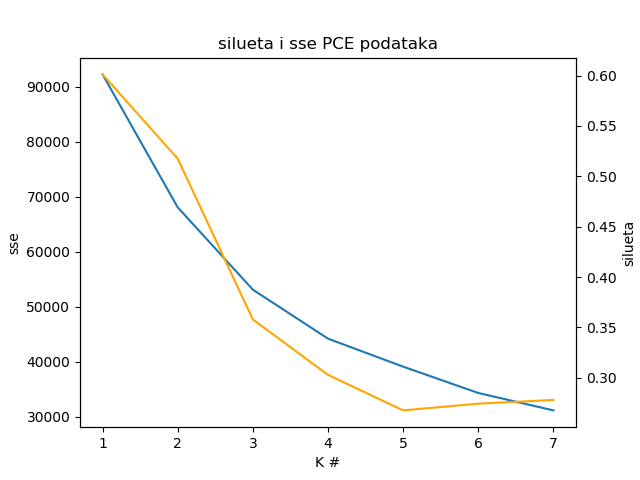

In [28]:
xs = [*range(1, 8)]

fig,ax = plt.subplots()
ax.plot(xs, ssesPCA)
ax.set_xlabel("K #")
ax.set_ylabel("sse")

ax2=ax.twinx()
ax2.plot(xs, siluetePCA, c = 'orange')
ax2.set_ylabel("silueta")
plt.title("silueta i sse PCE podataka")
plt.show()

#### sada cemo koristiti hijerarhijsko klasterovanje

<IPython.core.display.Javascript object>


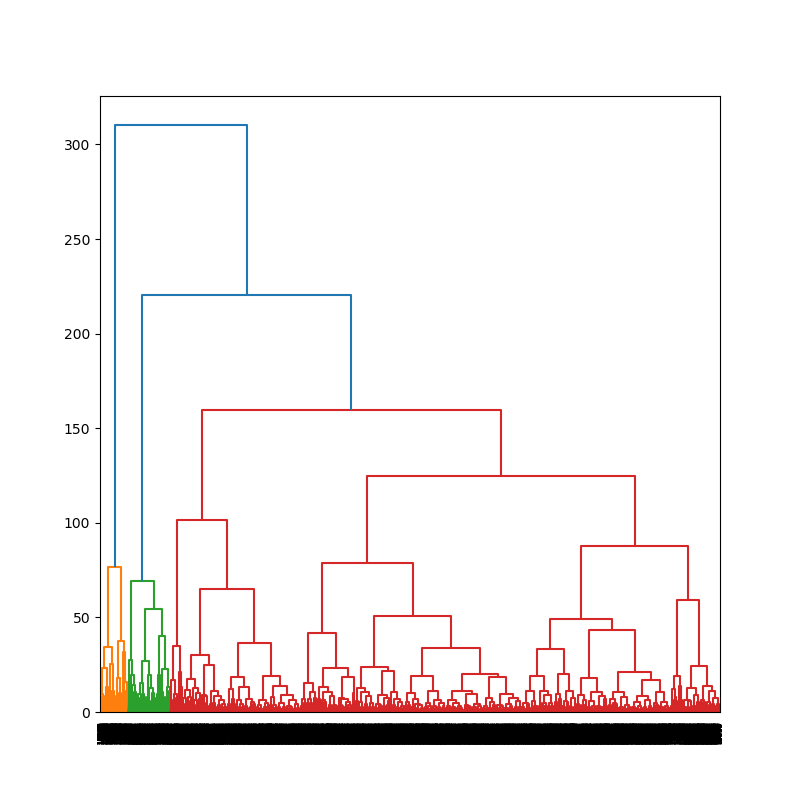

In [29]:
plt.figure(figsize =(8, 8))
stablo = shc.dendrogram((shc.linkage(x, method = 'ward')))
plt.show()

In [30]:
ssesH = []
silueteH = []
br_klasteras = []
xx = 1

In [31]:
def hijerarhijsko(br_klastera):
    fig = plt.figure(figsize = (4, 4))
    ax = Axes3D(fig)
    ax.view_init(27,91)
    
    cft = False
    if(br_klastera == 2):
        cft = True
    br_klasteras.append(br_klastera)
    hijerarhijsko = AgglomerativeClustering(n_clusters = br_klastera, compute_full_tree = cft, memory = 'memory')
    hijerarhijsko.fit(x)
    
    silueteH.append(silhouette_score(x, hijerarhijsko.labels_))
    print("Silueta: %f" % silhouette_score(x, hijerarhijsko.labels_))
    ax.scatter(x_pca[0], x_pca[1], x_pca[2], c = hijerarhijsko.labels_)

<IPython.core.display.Javascript object>


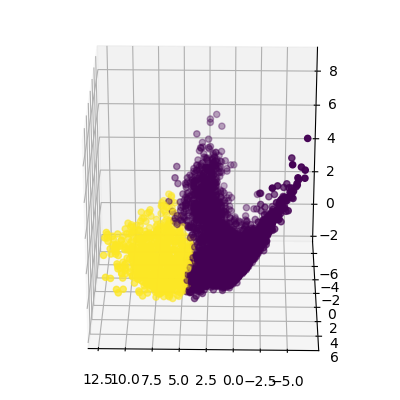

Silueta: 0.663314


In [32]:
hijerarhijsko(2)

<IPython.core.display.Javascript object>


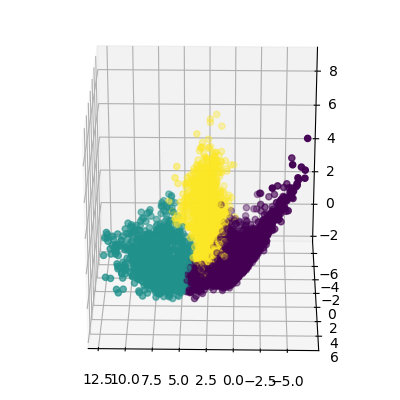

Silueta: 0.551721


In [33]:
hijerarhijsko(3)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


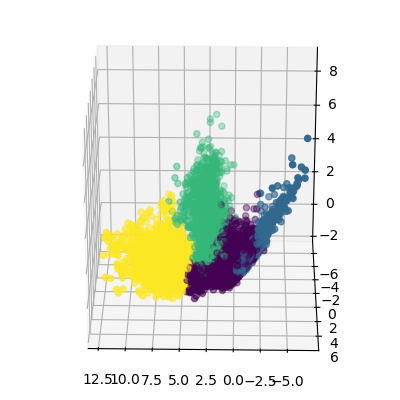

Silueta: 0.262396


In [34]:
hijerarhijsko(4)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


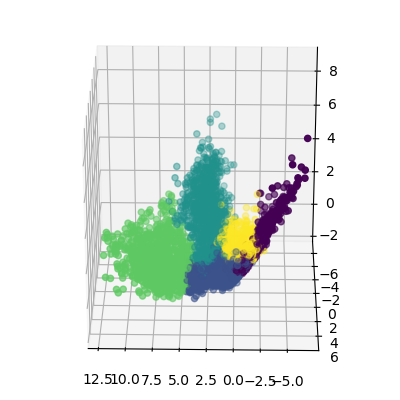

Silueta: 0.213242


In [35]:
hijerarhijsko(5)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


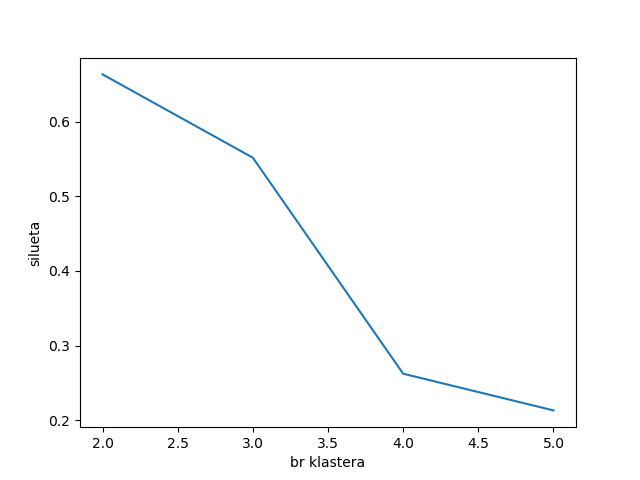

In [36]:
fig,ax = plt.subplots()
ax.plot(br_klasteras, silueteH)
ax.set_xlabel("br klastera")
ax.set_ylabel("silueta")
plt.show()

#### poredeci slike hijerarhijskog klasterovanja i ka sredina vidimo da dobijamo donekle slicne rezultate